In [19]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.neighbors import KNeighborsClassifier

In [2]:
data_train = pd.read_csv("train.csv")
data_test = pd.read_csv("test.csv")

In [3]:
data_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data_train.shape

(42000, 785)

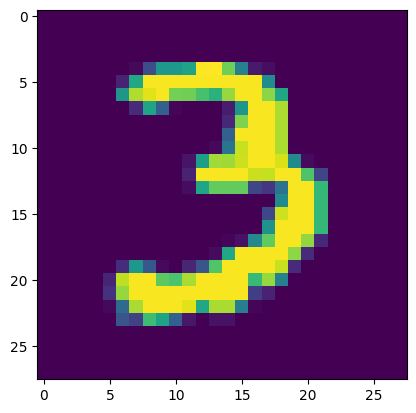

In [8]:
num = np.array(data_train.iloc[9, 1:]).reshape(28,28)
plt.imshow(num)
plt.show()

In [9]:
arr = data_train.iloc[3,1:]

(array([691.,   7.,  18.,   4.,   5.,   5.,   7.,  12.,   9.,  26.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <BarContainer object of 10 artists>)

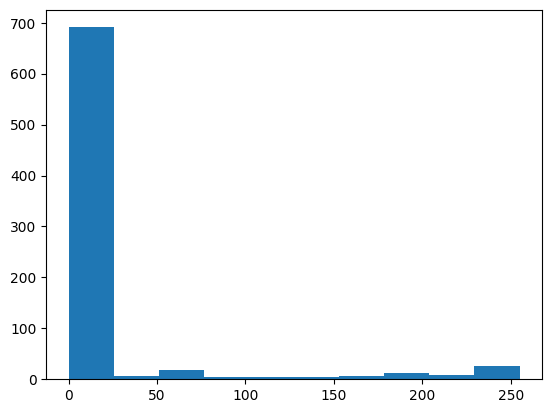

In [10]:
plt.hist(arr)

In [11]:
max(arr)

255

RGB (28,28,3)                GreyScale (28,28)       0 = black 255 = white

In [12]:
data_train.isna().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

x 

In [15]:
x = np.array(data_train)
y = np.array(data_test)

X_train = x[:,1:]
Y_train = x[:,0]
X_test = y

In [16]:
X_train = X_train.reshape(-1,28,28,1)

In [17]:
datagen = ImageDataGenerator(
    rotation_range = 15,
    height_shift_range = 0.1,
    zoom_range = 0.1,
    shear_range = 0.1,
)
datagen.fit(X_train)

In [18]:
X_train = X_train.reshape(-1, 784)

In [20]:
knn = KNeighborsClassifier(n_neighbors= 5)
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [21]:
int(knn.predict(X_test[100].reshape(1,-1)))

C:\Users\harme\AppData\Local\Temp\ipykernel_14196\3305597004.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  int(knn.predict(X_test[100].reshape(1,-1)))


0

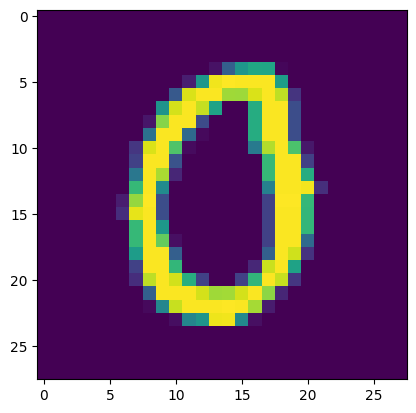

In [22]:
num = np.array(data_test.iloc[100,:]).reshape(28,28)
plt.imshow(num)
plt.show()